<html>
    <body>
        <pre><b><font size = 4>       Determination of Short Tail Keywords for Marketing</font></b></pre>

<html>
    <body>
        <pre><font size = 2>                                             21 May 2021</font></pre>

## 1. Problem Statement

**Ross, the marketing director of an artificial intelligence (AI) conference, had to report to
the board with recommendations for short tail keywords for the marketing of the 2015
conference**. He also had to come up with a visualization of research papers submitted so
far, grouped by their paper type.
The conference is run by a nonprofit scientific society that ensures advancements
in the domains of artificial intelligence. It does so by enhancing public understanding of
the domain, as well as by providing researchers with a platform for them to present their
findings in yearly conferences.
In order to come up with a solution for the problem at hand, Ross started off by going
through the web site. However, the magnitude of content from the research papers was
too much for him to make an analysis.

Ross loaded the data dump in Microsoft Excel and started looking through the
features. He thought that one strategy could be to group the papers by keywords or
groups. He could then run separate ads on social media and use SEO (search engine
optimization) to target the respective keywords within them. However, there were too
many distinct values within keywords and group features, and thus they would result
in many clusters of SEO keywords. His strategy was to come up with a maximum of ten
different SEO keyword groups and let them run for several days to reap benefits. He had
heard something about clustering, where you cluster the data into a fixed number of
clusters, and so he decided that clustering would be his starting point.

## 2. Analysis Plan

The plan is initially to break the research papers into segments so that we could focus on each one
of them by means of the targeted short tail and long tail keywords. I then looked at the
features to filter out the ones that resonated to his approach. I believed
that the Authors field was irrelevant and that the Abstract field was too detailed in nature.

## 3. The Dataset

the dataset has data on
approximately 400 research papers. Moreover, he found validation for his deduction that
all of the features within the dataset are in a string data format. He also noticed that a
given research paper can fall into more than one group and keyword.

## 4. Features Information

|Feature name| Description
---------------|------------
Title |Title of the paper
Authors |Author(s) of the paper
Groups |Author-selected, high-level keyword(s)
Keywords |Author-generated keywords
Topics |Author-selected, low-level keywords
Abstracts |Paper abstracts

In [55]:
import operator
import itertools 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pylab import  rcParams
from sklearn.decomposition import PCA
from wordcloud import WordCloud,STOPWORDS
from scipy.spatial.distance import cdist , pdist
from sklearn.cluster import KMeans , SpectralClustering
from sklearn.metrics import euclidean_distances, silhouette_score

rcParams['figure.figsize'] = 15,5

In [18]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/[UCI] AAAI-14 Accepted Papers - Papers.csv")
data.head()

,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


In [19]:
## Strecthing the row-wise as a function of groups

s = data['groups'].str.split("\n").apply(pd.Series,1).stack()
s.index = s.index.droplevel(-1)
s.name = 'groups'
del data['groups']
data = data.join(s).reset_index()

In [20]:
## Adding new Variable for Group memebership
data['flags'] = pd.Series(np.ones(len(data)),index = data.index)
data.head(2)

,index,title,authors,keywords,topics,abstract,groups,flags
0,0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...,Novel Machine Learning Algorithms (NMLA),1.0
1,1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,AI and the Web (AIW),1.0


In [21]:
## creating a function for matrix creation
def matrix_from_data(data):
  matrix = data.pivot_table(index = ['title'],columns = ['groups'],values = 'flags')
  matrix = matrix.fillna(0).reset_index()
  x_cols = matrix.columns[1:]
  return matrix , x_cols

In [22]:
matrix ,x_cols = matrix_from_data(data)
matrix.head()

groups,title,AI and the Web (AIW),Applications (APP),Cognitive Modeling (CM),Cognitive Systems (CS),Computational Sustainability and AI (CSAI),Game Playing and Interactive Entertainment (GPIE),Game Theory and Economic Paradigms (GTEP),Heuristic Search and Optimization (HSO),Human-Computation and Crowd Sourcing (HCC),Humans and AI (HAI),Knowledge Representation and Reasoning (KRR),Machine Learning Applications (MLA),Multiagent Systems (MAS),NLP and Knowledge Representation (NLPKR),NLP and Machine Learning (NLPML),NLP and Text Mining (NLPTM),Novel Machine Learning Algorithms (NMLA),Planning and Scheduling (PS),Reasoning under Uncertainty (RU),Robotics (ROB),Search and Constraint Satisfaction (SCS),Vision (VIS)
0,"""Source Free"" Transfer Learning for Text Class...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A Characterization of the Single-Peaked Single...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"A Computational Method for (MSS,CoMSS) Partiti...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,A Control Dichotomy for Pure Scoring Rules,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Convex Formulation for Semi-supervised Multi...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Elbow for K means Clustering')

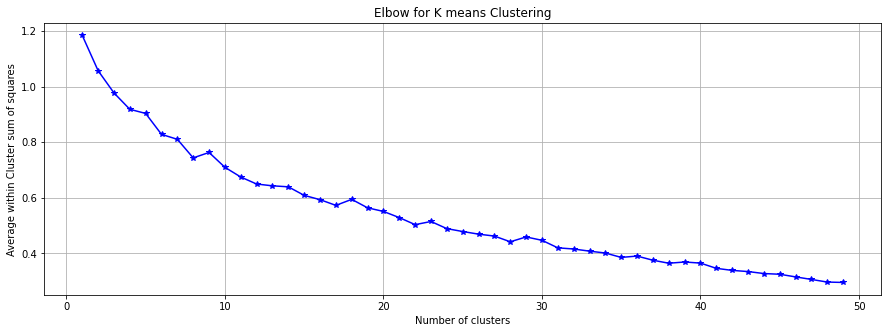

In [23]:
## defining metrics for model evaluation
# elbow method
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters = k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X,cent,'euclidean') for cent in centroids]
dist = [np.min(D,axis = 1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]
 
fig = plt.figure()
ax= fig.add_subplot(111)
ax.plot(K,avgWithinSS,"b*-")
plt.grid(True)
plt.xlabel("Number of clusters")
plt.ylabel("Average within Cluster sum of squares")
plt.title("Elbow for K means Clustering")

Text(0.5, 1.0, 'Elbow for KMeans clustering')

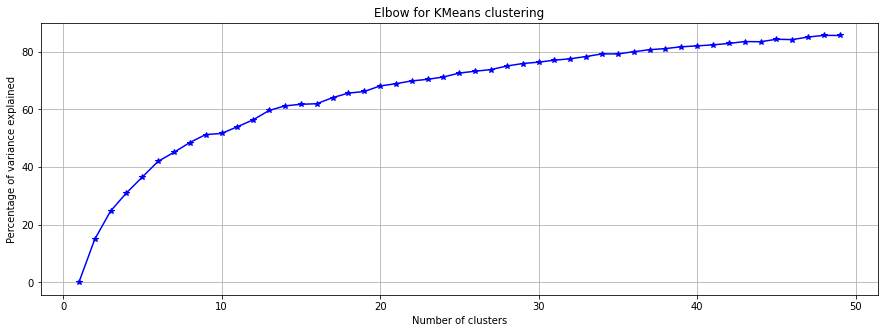

In [24]:
## Varaince explained method
X = matrix[x_cols]
K = range(1,50)
KM = [KMeans(n_clusters = k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X,cent,'euclidean') for cent in centroids]
dist = [np.min(D,axis = 1) for D in D_k]

wcss = [sum(d**2)for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss  - wcss

kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

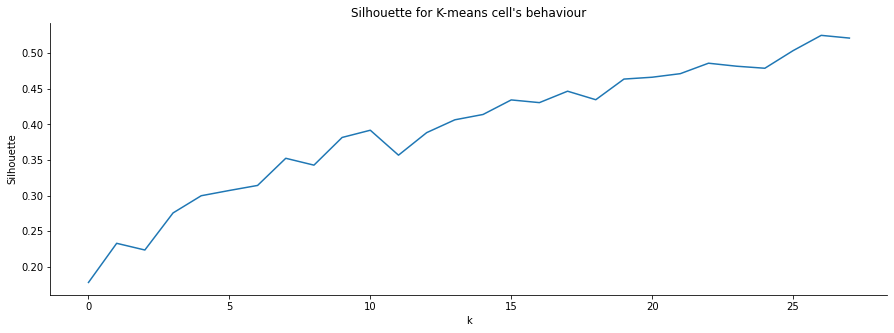

In [25]:
## Plotting Silhouute score

s = []
for n_clusters in range(2,30):
  kmeans = KMeans(n_clusters = n_clusters)
  kmeans.fit(X)

  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_

  s.append(silhouette_score(X,labels,metric = 'euclidean'))

plt.plot(s)
plt.ylabel("Silhouette")
plt.xlabel("k")
plt.title("Silhouette for K-means cell's behaviour")
sns.despine()

In [26]:
#Better to take nine clusters
# applying kmeans with 9 cluster size
cluster = KMeans(n_clusters = 9,random_state = 90)
matrix['cluster'] = cluster.fit_predict(X)
matrix.cluster.value_counts()
                                        

2    78
0    78
3    54
4    48
6    35
8    32
1    30
7    24
5    17
Name: cluster, dtype: int64

In [27]:
# Using PCA to transform Group related features into two components
pca = PCA(n_components = 2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix["y"] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['title','cluster','x','y']]
customer_clusters.head()

groups,title,cluster,x,y
0,"""Source Free"" Transfer Learning for Text Class...",2,0.615810,-0.060295
1,A Characterization of the Single-Peaked Single...,3,-0.756838,0.971322
2,"A Computational Method for (MSS,CoMSS) Partiti...",7,-0.287956,-0.216148
3,A Control Dichotomy for Pure Scoring Rules,3,-0.521295,0.570206
4,A Convex Formulation for Semi-supervised Multi...,8,0.198578,-0.129668


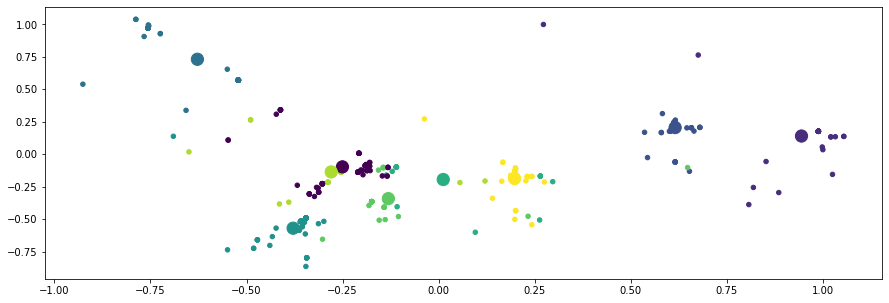

In [28]:
## Plotting clusters
cluster_centers = pca.transform(cluster.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers,columns  = ["x","y"])
cluster_centers['cluster'] = range(0,len(cluster_centers))

plt.scatter(customer_clusters['x'],customer_clusters['y'],s = 20,c = customer_clusters['cluster'])
plt.scatter(cluster_centers['x'],cluster_centers['y'],s = 150,c = cluster_centers['cluster'])

In [29]:
customer_clusters.columns.name = None
df = data.merge(customer_clusters, on='title')
df.head()

,index,title,authors,keywords,topics,abstract,groups,flags,cluster,x,y
0,0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...,Novel Machine Learning Algorithms (NMLA),1.0,2,0.613870,0.245408
1,1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,AI and the Web (AIW),1.0,2,0.615810,-0.060295
2,1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...,Novel Machine Learning Algorithms (NMLA),1.0,2,0.615810,-0.060295
3,2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...,Game Theory and Economic Paradigms (GTEP),1.0,3,-0.521295,0.570206
4,3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...,NLP and Text Mining (NLPTM),1.0,0,-0.183192,-0.090091


In [30]:
## creating function for wordclouds
def wordcloud_object(word_string):
  wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'white',width = 1200,height=1000,max_words = 10).generate(' '.join(word_string))
  return wordcloud

In [31]:
def plot_wordcloud(df,clusters,pivot):
  fig = plt.figure(figsize = (15,29.5))
  for cluster in range(clusters):
    List_ = []
    for x in df[df['cluster']==cluster][pivot]:
      try:
        List_.extend(x.split('\n'))
      except:
        pass

      if List_:
        ax = fig.add_subplot(5,2,cluster+1)
        wordcloud = wordcloud_object(List_)
        plt.title("Cluster : %d"%(cluster+1))
        ax.imshow(wordcloud)
        ax.axis('off')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

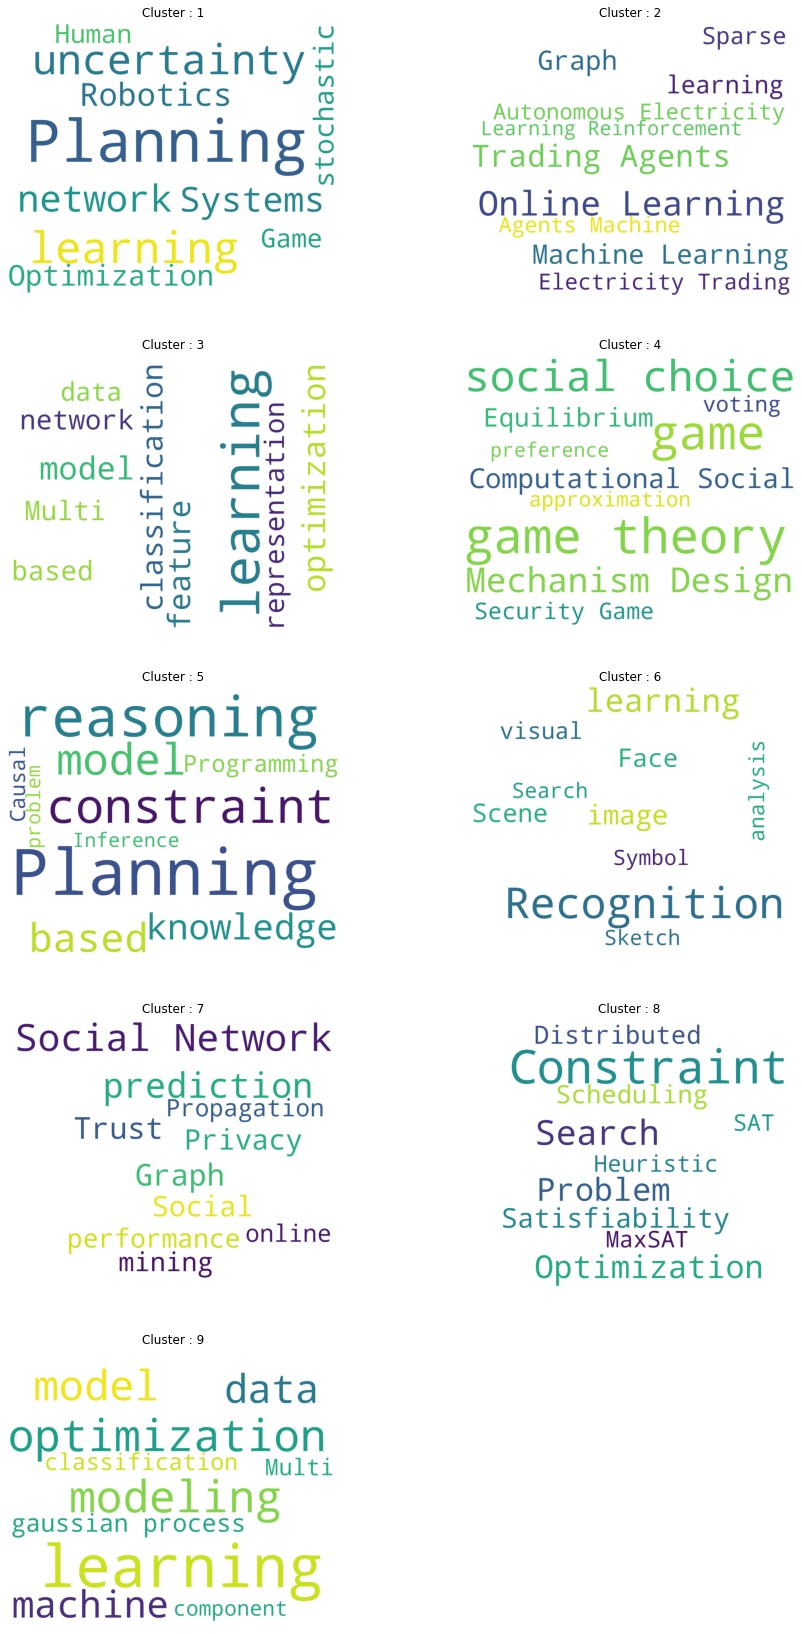

In [32]:
plot_wordcloud(df,cluster.n_clusters,'keywords')

In [33]:
def perform_cluster_group_audit(clusters, term):
    for cluster in clusters:
        df_cluster = df[df['cluster'] == cluster]
        print('Cluster number: %d'%(cluster + 1))
        keywords = list(df_cluster['keywords'])
        keywords = [keyword.split('\n') for keyword in keywords]
        keywords = [item for sublist in keywords for item in sublist]
        keywords = [keyword.lower() for keyword in keywords if term in keyword.lower()]
        keywords_freq = {x:keywords.count(x) for x in keywords}
        print(sorted(keywords_freq.items(), key=operator.itemgetter(1),reverse=True))
        print('\n')

In [34]:
perform_cluster_group_audit([0,4],'search')

Cluster number: 1
[('heuristic search', 7), ('greedy best first search', 4), ('monte carlo tree search', 2), ('incremental search', 1), ('real-time search', 1), ('agent-centered search', 1), ('hierarchical search', 1), ('parallel search', 1), ('bounded suboptimal search', 1), ('best-first search', 1), ('suboptimal heuristic search', 1)]


Cluster number: 5
[('heuristic search', 2), ('search control', 2)]




In [35]:
perform_cluster_group_audit([2,4,6],"social")

Cluster number: 3
[('heterogeneous social networks', 2), ('social conformity', 2)]


Cluster number: 5
[('computational social choice', 4)]


Cluster number: 7
[('social networks', 6), ('social infectivity', 3), ('social network', 3), ('location based social network', 2), ('social network analysis', 2), ('social influence', 2), ('social dynamics', 1), ('social explanation', 1)]




([], <a list of 0 Text major ticklabel objects>)

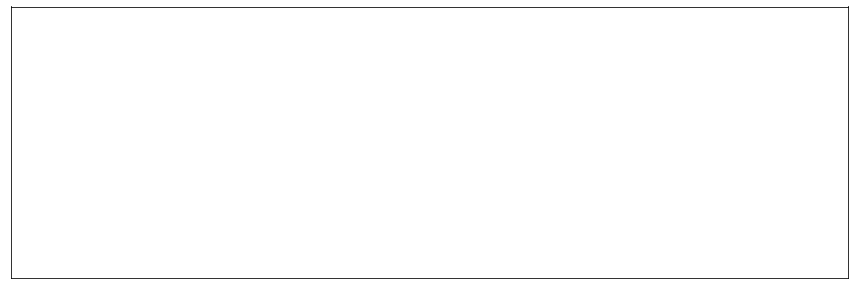

In [46]:
def plot_results(X , Y_ , means,covariances,index,title):
  color_iter  = itertools.cycle(['b','g','red','m','y','navy','c','cornflowerblue','gold','darkorange'])
  splot = plt.subplot(2,1,1+index)

  for i, (mean,covar,color) in enumerate(zip(means,covariances,color_iter)):
    v,w = np.linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])

    if not np.any(Y_ == i):
      continue
    plt.scatter(X[Y_ == i , 0], X[Y_ == i,1],0.8,color = color)
    angle = np.arctan(u[1]/u[0])
    angle = 180. * angle/np.pi 
    ell = mpl.patches.Ellipse(mean ,v[0],v[1],180.0+ angle, color = color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)

plt.xlim(0.0,0.1)
plt.ylim(-0.2,1.2)

plt.xticks(())
plt.yticks(())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


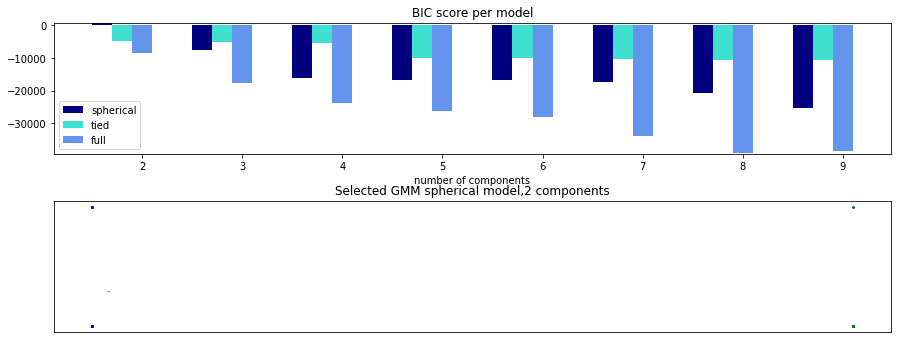

In [56]:
## Determining optimal Covariance Type and components for model and plotting it
X = matrix[x_cols].values

model_stats = []

n_components_range = range(2,10)
cv_types = ['spherical',"tied",'full']
for cv_type in cv_types:
  for n_components in n_components_range:
    gmm = mixture.GaussianMixture(n_components = n_components,covariance_type = cv_type ,random_state = 0)
    gmm.fit(X)
    model_stats.append({'name':'%s_%d'%(cv_type,n_components),'model':gmm,'bic':gmm.bic(X)})

bic = np.array([m_type['bic'] for m_type in model_stats])
best_gmm = model_stats[bic.argmax()]
clf = best_gmm['model']
color_iter = itertools.cycle(['navy','turquoise','cornflowerblue'])

bars = []

## Plotting the BIC scores
spl = plt.subplot(2,1,1)
for i, (cv_type,color) in enumerate(zip(cv_types,color_iter)):
  xpos = np.array(n_components_range) + 0.2 * (i-2)
  bars.append(plt.bar(xpos,bic[i * len(n_components_range):(i+1)* len(n_components_range)],width = 0.2,color = color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - 0.01 * bic.max(),bic.max()])
plt.title("BIC score per model")
spl.set_xlabel("number of components")
spl.legend([b[0] for b in bars],cv_types)

labels = clf.predict(X)
plot_results(X,labels,gmm.means_,gmm.covariances_,1,'Gaussian Mixture-%s'%gmm.converged_)

plt.xticks(())
plt.yticks(())
plt.title("Selected GMM %s model,%s components"%(best_gmm['name'].split('_')[0],best_gmm['name'].split("_")[1]))
plt.subplots_adjust(hspace = 0.35,bottom = 0.02)
plt.show()

In [49]:
matrix['cluster'] = labels
matrix.cluster.value_counts()

0    359
1     37
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

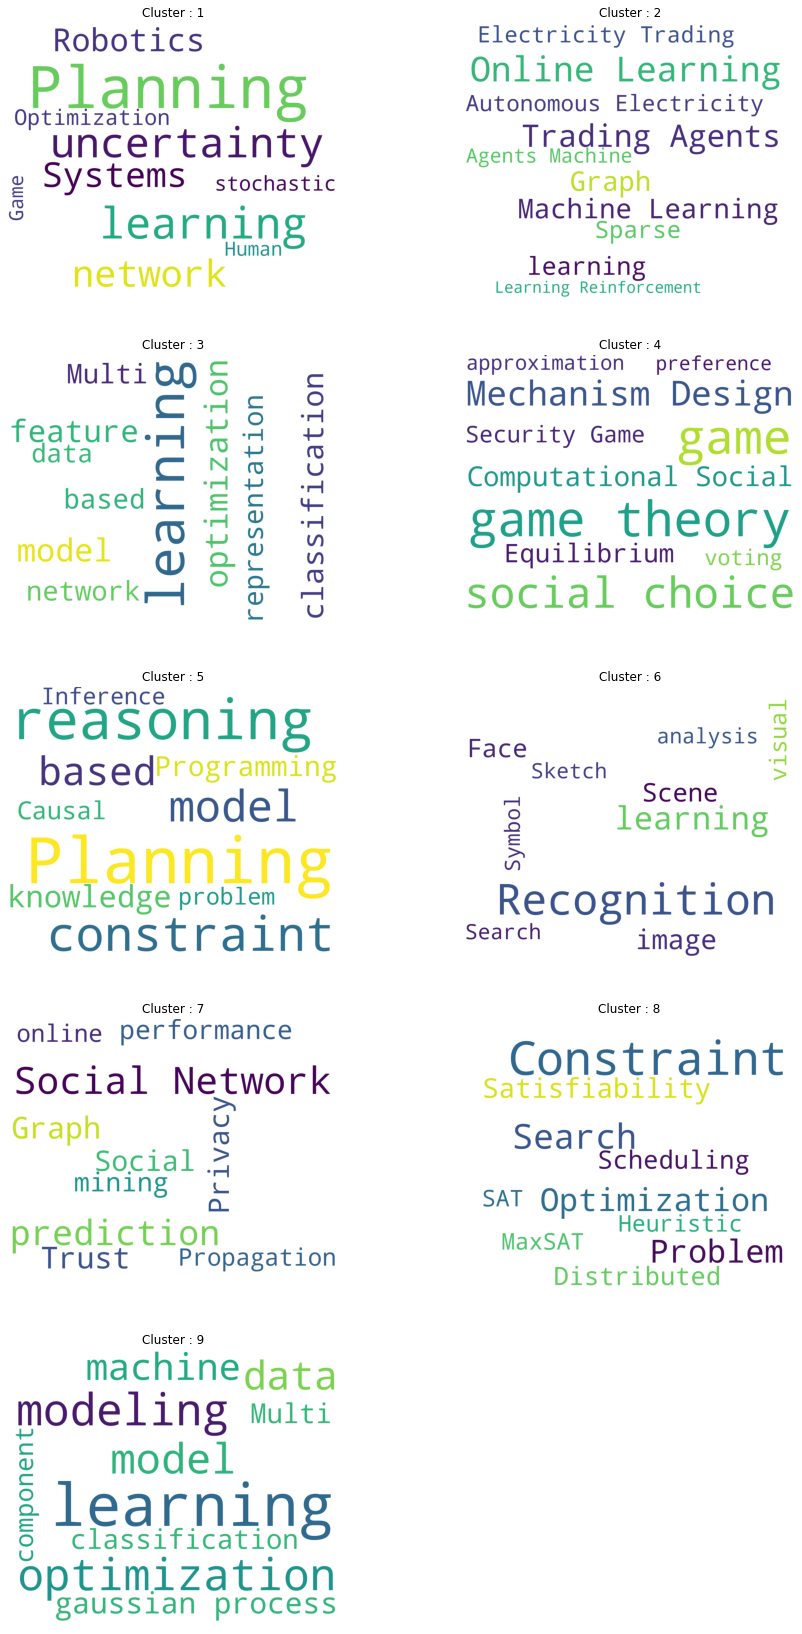

In [50]:
customer_clusters.columns.name  = None
df = data.merge(customer_clusters,on = 'title')
plot_wordcloud(df,gmm.n_components,'keywords')

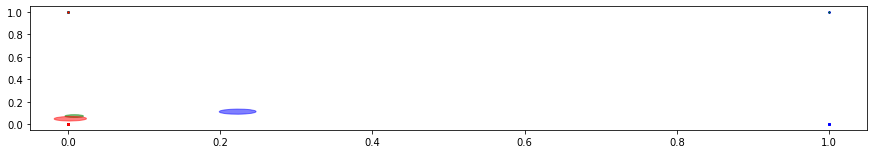

In [57]:
matrix,x_cols = matrix_from_data(data)
X = matrix[x_cols].values

dpgmm = mixture.BayesianGaussianMixture(n_components = 3,covariance_type = 'full',random_state = 1).fit(X)
labels = dpgmm.predict(X)

plot_results(X,labels,dpgmm.means_,dpgmm.covariances_,1,'Bayesian Gaussian Mixture with Dirichlet process prior-%s'%dpgmm.converged_)
plt.show()

The three components were sufficient
for the model to converge.

In [58]:
matrix['cluster'] = labels
matrix.cluster.value_counts()

0    215
1    139
2     42
Name: cluster, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently re

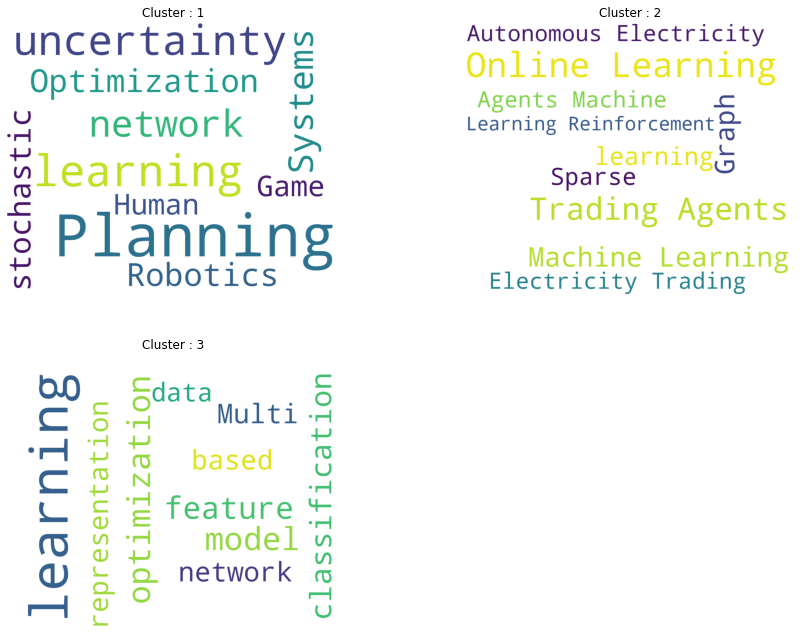

In [62]:
customer_clusters.columns.name = None
df = data.merge(customer_clusters,on = 'title')

plot_wordcloud(df,dpgmm.n_components,'keywords')

## 6. Conclusion

- Cluster 1: Papers discussing optimization and Robotics
media analytics
- Cluster 2: Topics on linear programming, knowledge graphs, and
reasoning-based models
- Cluster 3: Papers discussing in depth model optimization and
models’ learning

Thus we got the keywords for ross to present for upcoming conference.